In [22]:
import pandas as pd   
import matplotlib.pyplot as plt
import time

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline

from numpy import mean

import warnings 
warnings.filterwarnings('ignore')

using the small (hand made) data of wage (demonstrated in lectrure 5)

In [23]:
"""This code reads in a CSV file called "wage_final.csv" from the "ISL_DataSets" directory and 
prints the first five rows of the dataframe to the console."""
df2 = pd.read_csv("ISL_DataSets\wage_final.csv")
df2.head()


,Race,Education,Job Class,Wage
0,Black,HS Grad,Industrial,80
1,Black,College Grad,Industrial,100
2,Black,College Grad,Information,160
3,White,College Grad,Industrial,120
4,White,HS Grad,Industrial,45


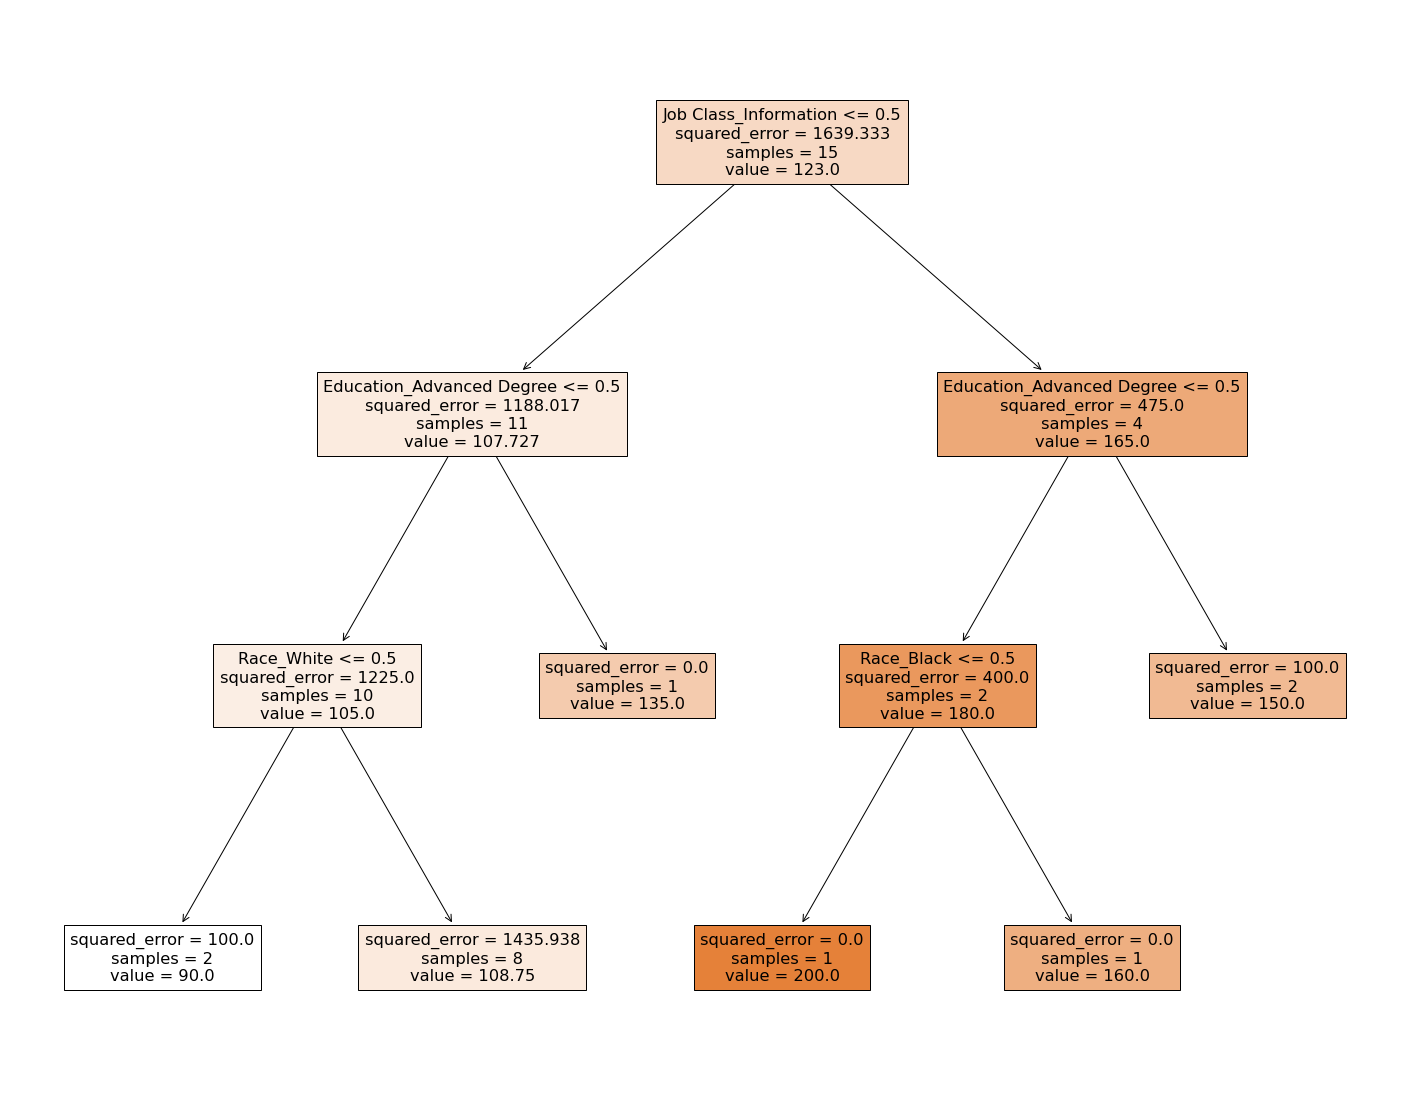

In [24]:
# This code creates a Decision Tree Regressor with a maximum depth of 3 and fits it to the data in 
# the dataframe df2. The features used to fit the model are Race, Education, and Job Class, which 
# are encoded into dummy variables using the get_dummies function. The target variable is Wage. 
# The tree is then plotted using the plot_tree function, with the feature names set to the 
# columns of the dummy variables.
X = df2[['Race','Education','Job Class']]
X2 = pd.get_dummies(X)
y = df2[['Wage']]
regTree = DecisionTreeRegressor(max_depth=3,random_state=0)
regTree.fit(X2, y)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regTree, feature_names=X2.columns, filled=True)

loading the Toyota Used Cars Sales data

In [25]:
df2 = pd.read_excel("DMforBA_DataSets\ToyotaCorolla.xls")
df2 = df2.loc[:, df2.columns != 'Id']
df = df2[['Price', 'Age_08_04', 'KM', 'Quarterly_Tax', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'ABS','Airco', 'Metallic_Rim']]
X = df.loc[:, df.columns != 'Price']
y = df[['Price']]


comparing the performances of difference models based on train-test split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
reg2 = LinearRegression().fit(X_train, y_train)
y_pred = reg2.predict(X_test)
print("LR: R2 = %.4f and MSE = %.2f" % (reg2.score(X_test,y_test), mean_squared_error(y_test, y_pred)))

regTree = DecisionTreeRegressor(max_depth=10,random_state=0)
regTree.fit(X_train, y_train)
y_pred = regTree.predict(X_test)
print("DT: R2 = %.4f and MSE = %.2f" % (regTree.score(X_test,y_test), mean_squared_error(y_test, y_pred)))

regRF = RandomForestRegressor(max_depth=10, max_features=4, min_samples_split=8,
                      n_estimators=300, random_state=0)
regRF.fit(X_train, y_train)
y_pred = regRF.predict(X_test)
print("RF: R2 = %.4f and MSE = %.2f" % (regRF.score(X_test,y_test), mean_squared_error(y_test, y_pred)))

regGB = GradientBoostingRegressor(max_depth=6, max_features=4, min_samples_split=8,
                      n_estimators=300, random_state=0)
regGB.fit(X_train, y_train)
y_pred = regGB.predict(X_test)
print("GB: R2 = %.4f and MSE = %.2f" % (regGB.score(X_test,y_test), mean_squared_error(y_test, y_pred)))


LR: R2 = 0.8272 and MSE = 2894931.28
DT: R2 = 0.8766 and MSE = 2067331.95
RF: R2 = 0.9008 and MSE = 1662500.94
GB: R2 = 0.9013 and MSE = 1653226.30


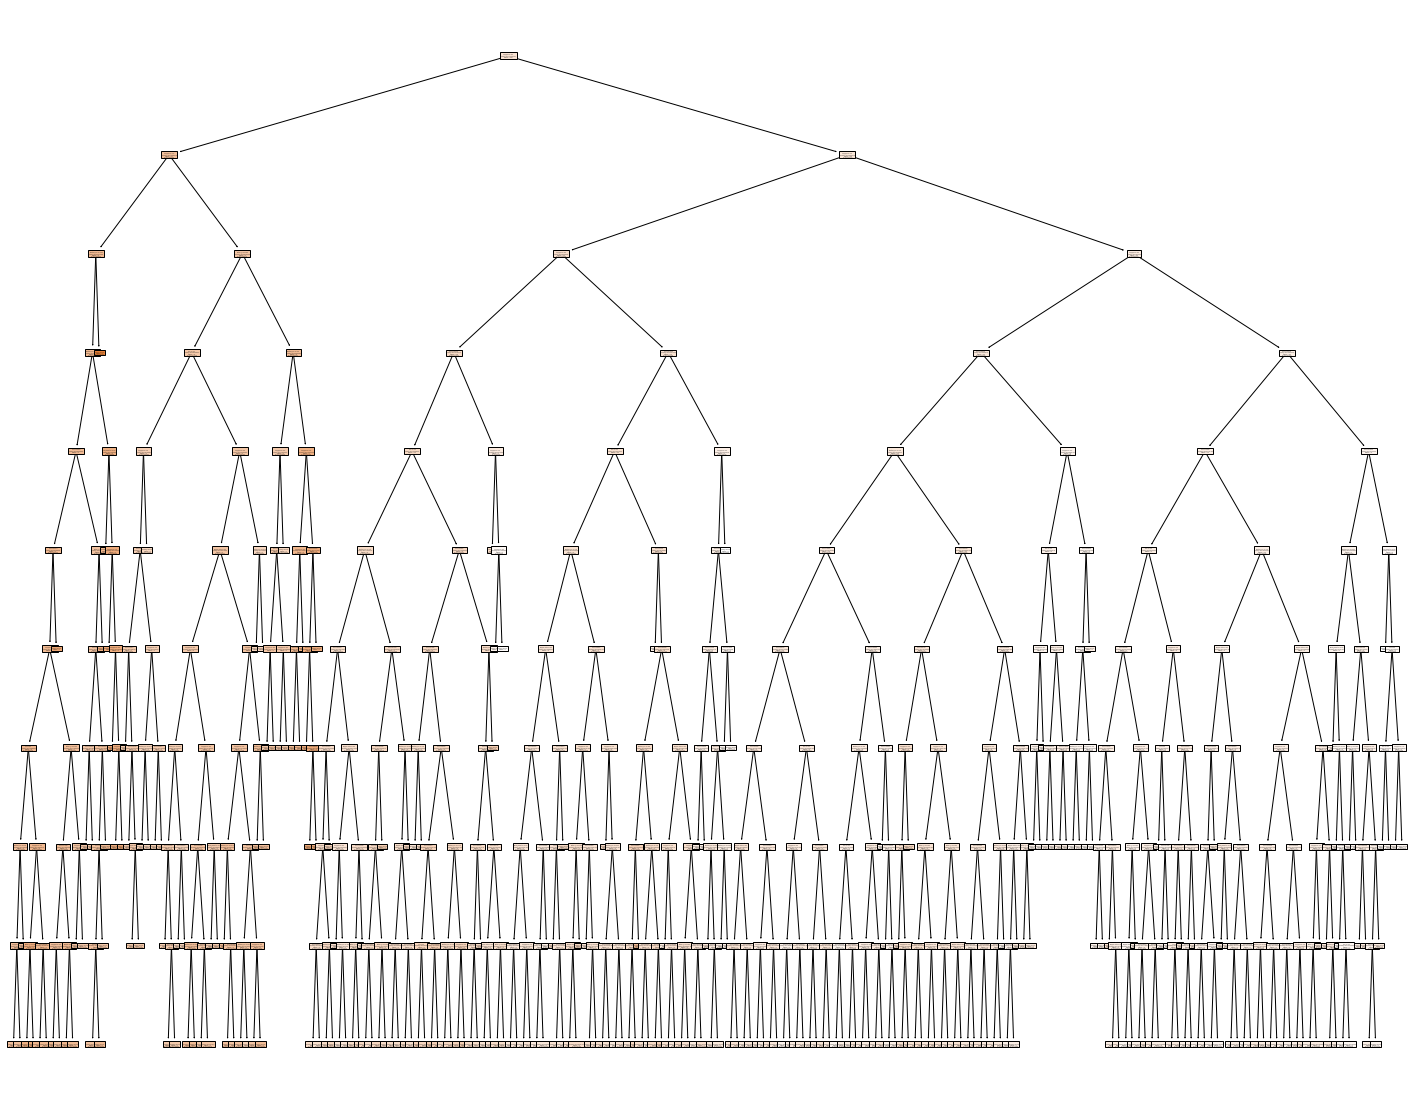

In [27]:
#this routine will take rouhgly 50 seconds to run
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regTree, feature_names=X_train.columns, filled=True)

plotting the max_depth against train-test scores

In [28]:
max_depth = range(1,20)
train_scores = []
test_scores = []
for a in max_depth:
    tree = RandomForestRegressor(random_state=0,max_depth=a)
    tree.fit(X_train,y_train)
    train_scores.append(tree.score(X_train,y_train))
    test_scores.append(tree.score(X_test,y_test))   


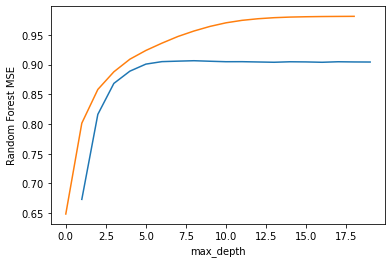

In [29]:
plt.plot(max_depth, test_scores, train_scores)
plt.xlabel('max_depth')
plt.ylabel('Random Forest MSE')
plt.show()

### Don't run the below code in the class - takes too much time

In [ ]:
# Don't Run this code - takes 10+ minutes
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
#regRF = RandomForestRegressor(max_depth=5, random_state=0)
regRF = RandomForestRegressor(random_state=0)
param_grid = {
    'bootstrap': [True],
    'max_depth': [5, 10, 15],
    'max_features': [2, 3, 4],    
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300] 
}
grid_search = GridSearchCV(estimator = regRF, param_grid=param_grid, cv = cv, n_jobs = -1, verbose = 2)
grid_search.fit(X, y)
best_grid = grid_search.best_estimator_
print(best_grid)

11m 49.1s <br>
Fitting 30 folds for each of 81 candidates, totalling 2430 fits <br>
RandomForestRegressor(max_depth=10, max_features=4, min_samples_split=8,
                      n_estimators=300, random_state=0)

In [ ]:
best_grid.score(X,y)

In [ ]:
best_grid.feature_importances_

In [ ]:
best_grid.feature_names_in_

identifying key features using feature importance

In [ ]:
importance_rf = pd.Series(best_grid.feature_importances_,
index=X_train.columns)
importance_rf_sorted = importance_rf.sort_values()
importance_rf_sorted.nlargest(20).plot(kind='barh', color='orange')
plt.title("Feature Importance Random Forest")
plt.show()

comparing more models in a concise way using train-test split

In [30]:
def fitting_models():
    lr=LinearRegression()
    ls = Lasso(alpha=10.5)
    rg = Ridge(alpha=1.5)
    dt = DecisionTreeRegressor(max_depth=5)
    rfr = RandomForestRegressor()
    gbr = GradientBoostingRegressor()
    
    rgs = [('Linear Regression', lr),
        ('Lasso', ls),
        ('Ridge', rg),
        ('Decision Tree', dt),
        ('Random Forest', rfr),
        ('Gradient Boosting', gbr)        
    ]
    for name,rg in rgs:
        rg.fit(X_train,y_train)
        pred = rg.predict(X_test)
        score = format(r2_score(y_test,pred), '.4f')
        print("{} : {}".format(name,score))

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
fitting_models()

Linear Regression : 0.8199
Lasso : 0.8200
Ridge : 0.8200
Decision Tree : 0.8800
Random Forest : 0.8979
Gradient Boosting : 0.9034


identifying the best value of k in knn-regressor (without scaling)

In [32]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
for i in range(1, 100,5):
    neigh = KNeighborsRegressor(n_neighbors=i)
    scores = cross_val_score(neigh, X, y, cv=cv) 
    score = format(mean(scores), '.4f')
    print("K={} : {}".format(i,score))


K=1 : 0.1645
K=6 : 0.4056
K=11 : 0.4269
K=16 : 0.4341
K=21 : 0.4473
K=26 : 0.4473
K=31 : 0.4461
K=36 : 0.4435
K=41 : 0.4386
K=46 : 0.4394
K=51 : 0.4432
K=56 : 0.4444
K=61 : 0.4460
K=66 : 0.4456
K=71 : 0.4452
K=76 : 0.4461
K=81 : 0.4460
K=86 : 0.4465
K=91 : 0.4464
K=96 : 0.4446


applying scacling (min-max) to knn-regressor

In [33]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_Scaled = scaler.fit_transform(X)
XS = pd.DataFrame(X_Scaled)
XS.columns = X.columns
for i in range(1, 20):
    neigh = KNeighborsRegressor(n_neighbors=i)
    scores = cross_val_score(neigh, XS, y, cv=cv) 
    score = format(mean(scores), '.4f')
    print("K={} : {}".format(i,score))

K=1 : 0.7948
K=2 : 0.8258
K=3 : 0.8279
K=4 : 0.8323
K=5 : 0.8341
K=6 : 0.8291
K=7 : 0.8235
K=8 : 0.8202
K=9 : 0.8197
K=10 : 0.8171
K=11 : 0.8137
K=12 : 0.8100
K=13 : 0.8072
K=14 : 0.8037
K=15 : 0.7995
K=16 : 0.7955
K=17 : 0.7923
K=18 : 0.7889
K=19 : 0.7858
